# COM6018 - Assignment 1

Student Username: `ACS24TC`

## Analysing Carbon Emissions Data

Before attempting the assignment make sure that you have read the accompanying assignment notes document carefully. This explains important details about what is expected and how you will be assessed.

## Loading the data

The data is being read from the file `owid-co2-data.csv` which you must download and store in the same directory as this notebook. Please leave the cell below unchanged. 

In [82]:
import pandas as pd
df = pd.read_csv('owid-co2-data.csv')

Add any further imports that your notebook needs in the cell below. If you are not using any then simply leave the cell blank. Remember, you are only allowed to use modules from the standard Python library, plus pandas, numpy, matplotlib and seaborn.

In [83]:
# SOLUTION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add any further imports that your notebook needs in this cell.

## Q1. The growth of CO<sub>2</sub> emissions

*How have CO<sub>2</sub> emissions grown over time?*

Consider the six continents: Africa, Asia, Europe, North America, Oceania and South America. Make a figure to show: i) how the total annual CO<sub>2</sub> emissions of each continent varied over the years 1950 to 2021. ii) How has the per capita CO<sub>2</sub> emissions (i.e., the emissions per person) of these continents varied over the same period.

Comment on how the contribution of each continent is different when measured in terms of total emissions and per capita emissions.

(Add your solution in the cells provided below.)

In [84]:
row_count = len(df)
#print("Number of rows:", row_count)
#df.head()
#print(df.columns)

target_continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
df_filter_continent = df.loc[df['country'].isin(target_continents)]
#print(df_filter_continent)

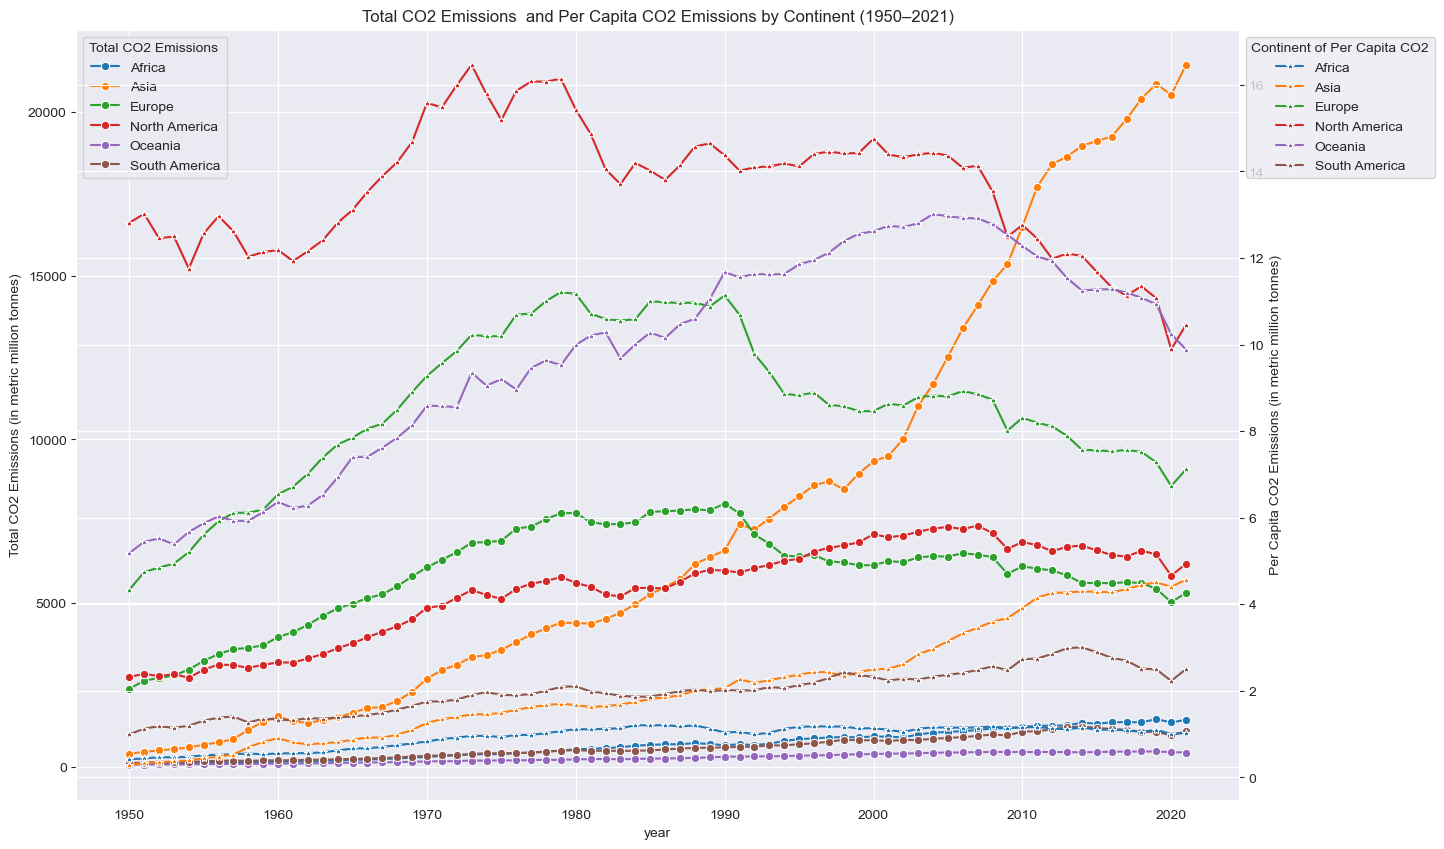

In [85]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.
#df.head()
#Check column in df
#print(df.columns)
#For field Co2 total emissions: year, country = continent, co2
#For field Co2 per capital emissions: year, country = continent, co2_per_capita (per person)

df_filtered_year = df_filter_continent[(df_filter_continent['year'] >= 1950) & (df_filter_continent['year'] <= 2021)]
#print(df_year)

total_emissions = df_filtered_year.groupby(['year', 'country'])['co2'].sum().reset_index()
#print(total_emissions)

#Use mean to get average per person at country level
per_capita_emissions = df_filtered_year.groupby(['year', 'country'])['co2_per_capita'].mean().reset_index()
#print(per_capita_emissions)

# Plotting in a single figure 
plt.figure(figsize=(15, 10))

# Plot Total CO2 Emissions on the left y-axis
ax1 = sns.lineplot(data=total_emissions, x='year', y='co2', hue='country', marker='o')
ax1.set_ylabel('Total CO2 Emissions (in metric million tonnes)')
ax1.set_title('Total CO2 Emissions  and Per Capita CO2 Emissions by Continent (1950–2021)')
ax1.grid(True)

# Create a second y-axis for the per capita CO₂ emissions , same x-axis
ax2 = ax1.twinx()
sns.lineplot(data=per_capita_emissions, x='year', y='co2_per_capita', hue='country', marker='*', linestyle='-', ax=ax2)
ax2.set_ylabel('Per Capita CO2 Emissions (in metric million tonnes)')

ax1.legend(title = 'Total CO2 Emissions ') 
ax2.legend(title='Continent of Per Capita CO2', loc='upper left', bbox_to_anchor=(1, 1)) 

plt.show()

# ADD YOUR ANSWER TO THE QUESTION HERE

In [86]:
#[Answer]
#Q. Comment on how the contribution of each continent is different when measured in terms of total emissions and per capita emissions ?
#Short Desc Comparison:
#Africa : Total Co2 Emission is less than Per Capita Co2 till 2010
#Asia : Total Co2 Emission is higher than  Per Capita Co2
#Europe : Total Co2 Emission is less than Per Capita Co2
#Nort America : Total Co2 Emission is less than Per Capita Co2
#Ocenia : Total Co2 Emission is less than Per Capita Co2
#South America : Total Co2 Emission is higher than Per Capita Co2

#The comparison of CO₂ emissions, Per Capita across continents reveals distinct patterns: 
# In Africa, total CO₂ emissions were initially lower than per capita emissions until around 2010, after which they began to surpass per capita levels. Africa’s total emissions have remained below 2,500 million tonnes, with per capita emissions typically below a value of 2. In Asia, total CO₂ emissions are consistently high, exceeding 20,000 million tonnes and always surpassing per capita emissions. Europe’s total emissions peak around 14,000 million tonnes and consistently remain higher than per capita values. In North America, total emissions are under 10,000 million tonnes and are also lower than per capita emissions. Oceania’s total emissions are approximately under 2,000 million tonnes, lower than the continent’s per capita emissions, which average around 10. Finally, in South America, total CO₂ emissions remain below 5,000 million tonnes and also fall below per capita emissions.

## Q2. The share of CO2 emissions by country over time.

*Which countries have the highest CO<sub>2</sub> emissions?*

Consider the five countries with the highest total CO<sub>2</sub> emissions in 2020. Make separate plots for the years 1960, 1990 and 2020 that show the share of the total world emissions that each of these countries contributed in these years.

Consider the five European countries with the highest total CO<sub>2</sub> emissions in 2020. Make separate plots for the years 1960, 1990 and 2020 that show the share of the total European emissions that each of these countries contributed in these years.

Do the highest global producers produce a larger or smaller proportion of the total worlds emissions in 2020 compared to 1960? Do the highest European producers produce a larger or smaller proportion of the total European emissions in 2020 compared to 1960?

(Add your solution in the cells provided below.)

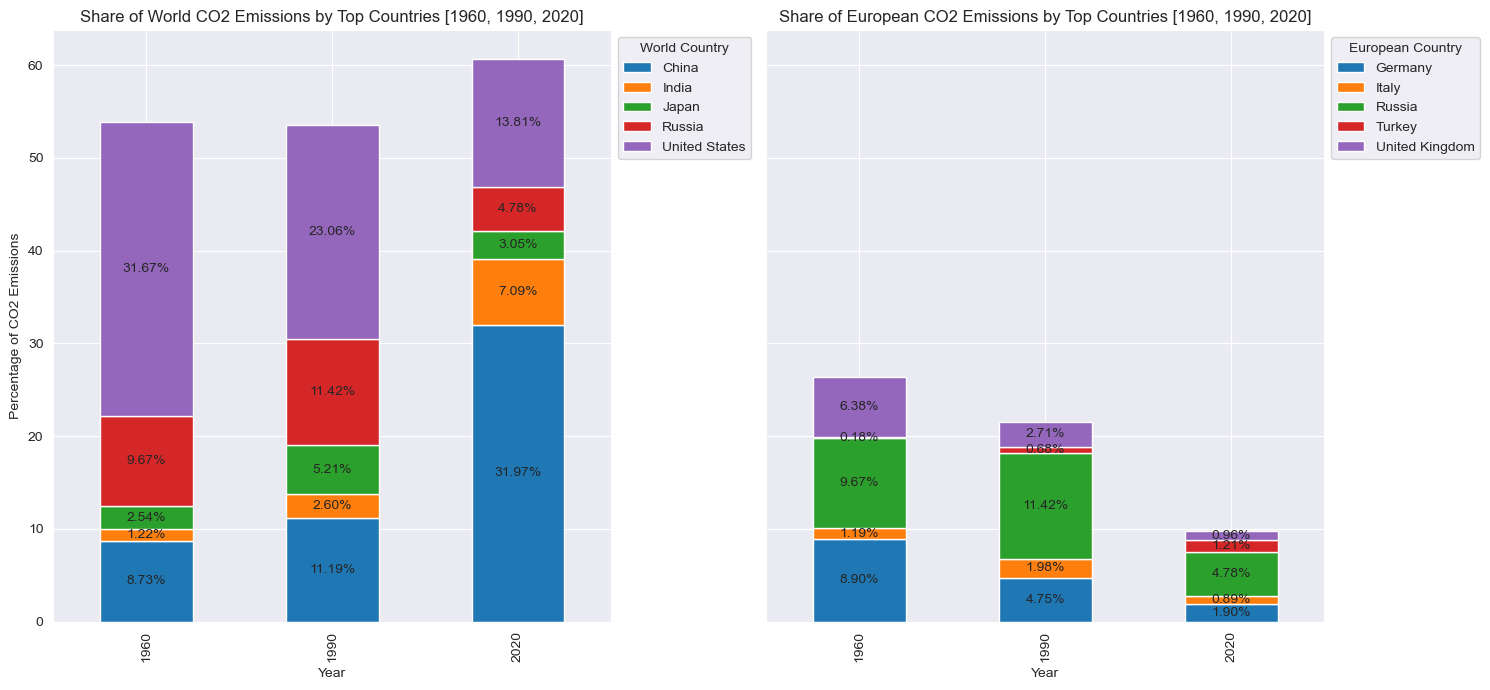

In [87]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.
europe_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", 
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", 
    "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", 
    "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", 
    "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", 
    "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", 
    "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", 
    "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican City"
]

continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'World','Non-OECD (GCP)', 'Asia (GCP)']

# 1.) Find 5 country with Highest Total Co2 emission in 2020 Make separate plots for the years 1960, 1990 and 2020 that show the share of the total world emissions that each of these countries contributed in these years

df_2020 = df.loc[df['year'] == 2020]
#Find sum co2 emission
country_emissions_2020 = df_2020.groupby('iso_code')['co2'].sum().reset_index()
top5_country = country_emissions_2020.sort_values(by='co2', ascending=False).head(5)['iso_code']
#print(country_emissions_2020)
#print(top5_country)
#CHN , USA, IND, RUS, JPN

# 2.) Consider the five European countries with the highest total CO2 emissions in 2020. 
# Make separate plots for the years 1960, 1990 and 2020 that
# show the share of the Total European emissions that each of these countries contributed in these years. 
df_filtered_year = df[(df['year'] == 1960) | (df['year'] == 1990) | (df['year'] == 2020)]


# Filter out rows where 'iso_code' is null, then calculate total world emissions by year
df_filtered_year_non_null = df_filtered_year[df_filtered_year['iso_code'].notna()]

# Group by year and sum CO2 emissions
total_world_emission = df_filtered_year_non_null.groupby('year')['co2'].sum().reset_index()

df_filtered_year_country = df_filtered_year.loc[df_filtered_year['iso_code'].isin(top5_country)] 
#print(df_filtered_year)
#print(df_filtered_year_country)
#print(total_world_emissions)

#Calculate share for each top country contribute xx% to the world total Co2 emission for that year
top5_data = df_filtered_year_country
top5_data = top5_data.merge(total_world_emission, on='year', suffixes=('', '_world'))
top5_data['share_of_the_total_world'] = top5_data['co2'] / top5_data['co2_world'] * 100
#print(top5_data)
#print(top5_data[['year','country', 'co2', 'co2_world', 'share_of_the_total_world']])

# 3.) Find 5 Europe country highest total Co2 in 2020 
df_2020 = df.loc[df['year'] == 2020]
#Find sum co2 emission
country_emissions_2020_eu = df_2020.groupby('country')['co2'].sum().reset_index()
country_emissions_2020_eu = country_emissions_2020_eu.loc[country_emissions_2020_eu['country'].isin(europe_countries)]
top5_country_eu = country_emissions_2020_eu.sort_values(by='co2', ascending=False).head(5)['country']
#print(top5_country_eu)
#Russia,Germany,Turkey,United Kingdom,Italy

#Calculate Europe share for each top country contribute xx% to the world total Co2 emission for that year
df_filtered_year_eu_country = df_filtered_year.loc[df_filtered_year['country'].isin(top5_country_eu)] 
top5_eu_data = df_filtered_year_eu_country
top5_eu_data = top5_eu_data.merge(total_world_emission, on='year', suffixes=('', '_world'))
top5_eu_data['share_of_the_total_eu_world'] = top5_eu_data['co2'] / top5_eu_data['co2_world'] * 100
#print(top5_eu_data)

# Filter for top 5 countries and the selected years
data_pivot = top5_data.pivot(index='year', columns='country', values='share_of_the_total_world')
data2_pivot = top5_eu_data.pivot(index='year', columns='country', values='share_of_the_total_eu_world')

# Plot the stacked bar chart
# Create a figure with two subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# Plot the global data on the first subplot (ax1)
data_pivot.plot(kind='bar', stacked=True, ax=ax1, legend=False)
ax1.set_title('Share of World CO2 Emissions by Top Countries [1960, 1990, 2020]')
ax1.set_ylabel('Percentage of CO2 Emissions')
ax1.set_xlabel('Year')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='World Country', loc='upper left', bbox_to_anchor=(1, 1))

# Plot the European data on the second subplot (ax2)
data2_pivot.plot(kind='bar', stacked=True, ax=ax2, legend=False)
ax2.set_title('Share of European CO2 Emissions by Top Countries [1960, 1990, 2020]')
ax2.set_xlabel('Year')

# Add percentage labels to each segment
for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.2f%%')

# Add a single legend for both charts
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2, title='European Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#3.)Do the highest global producers produce a larger or smaller proportion of the total worlds emissions in 2020 compared to 1960? Do the highest European producers produce a larger or smaller proportion of the total European emissions in 2020 compared to 1960?
# Ans is below graph section.



# ADD YOUR ANSWER TO THE QUESTION HERE

In [88]:
#Do the highest global producers produce a larger or smaller proportion of the total worlds emissions in 2020 compared to 1960? 
# Do the highest European producers produce a larger or smaller proportion of the total European emissions in 2020 compared to 1960?

#[Answer]
# The highest global producer(world Country from 2020) which is China produce larger portion in 2020 (31.97%) compare with 1960 (8.73%).
# The highest European produce which is Russia produce smaller portion in 2020 (4.78%) compare with 1960 (9.67%).


## Q3. The link between GDP and CO<sub>2</sub> emissions

*Do countries with high GDP always have high per capita CO<sub>2</sub> emissions.* 

Plot the per capita CO<sub>2</sub> emissions against the GDP per capita for each country, adjusting the area of each marker to represent the population of the country. Only include countries with a population of at leat 10 million people in 2018. Annotate significant countries on the plot, such as large countries or outliers.

Compare these plots for the year 1978, 1998 and 2018. Comment on any patterns in the relationship between GDP per capita and CO₂ emissions per capita and how they may have changed over time.

(Add your solution in the cells provided below.)

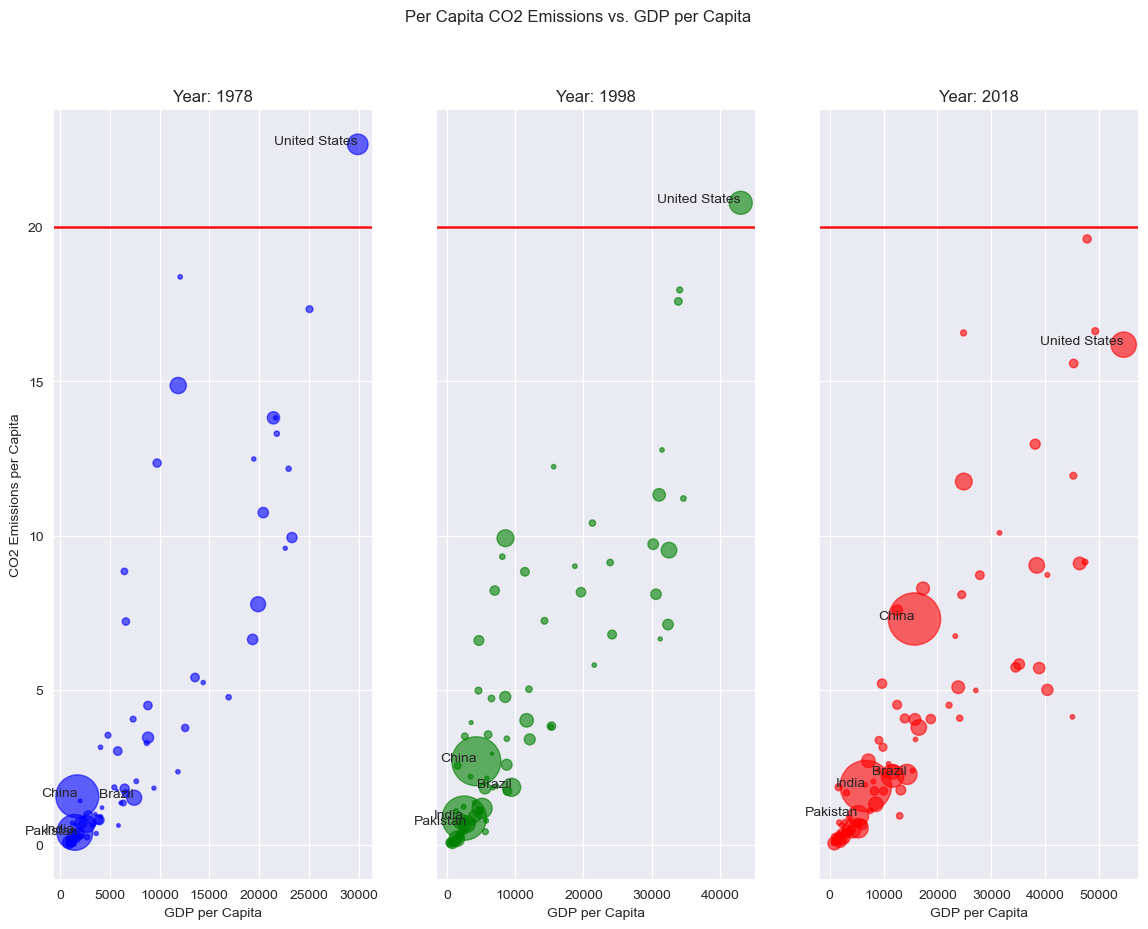

In [89]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.
# Outlier : Cut the line for outlier where Co2 per Capita is over 20 
# Field : GDP/Population, Co2_per_capita
#df['GDP_per_capita'] = df.loc[df['gdp']/df['population']]

# Clean null 
df_clean = df.dropna(subset=['gdp', 'population','iso_code'])
# 15211:  len(df_clean)

# Filter year and data to get 2018 with more than 10M
df_clean = df_clean[df_clean['population'] > 0].copy()
df_clean['gdp_per_capita'] = df_clean['gdp'] / df_clean['population']
country_10M = df_clean.loc[(df_clean['year'] == 2018) & (df_clean['population'] > 10000000)]
df_clean_filter_population_year = df_clean.loc[(df_clean['year'].isin([1978, 1998, 2018])) & df_clean['iso_code'].isin(country_10M['iso_code'])]
#print(df_clean_filter_population_year)

# Check large population country in 1997,1998,2018
unique_countries = df_clean.groupby('iso_code', as_index=False)['population'].max()
unique_countries_sorted = unique_countries.sort_values(by='population', ascending=False)
#print(unique_countries_sorted.head(8))

# Annotate significant countries top 5 country , desc population 
significant_countries = ['CHN', 'IND', 'USA', 'PAK', 'BRA']
year_1978 = df_clean_filter_population_year[df_clean_filter_population_year['year'] == 1978]
year_1998 = df_clean_filter_population_year[df_clean_filter_population_year['year'] == 1998]
year_2018 = df_clean_filter_population_year[df_clean_filter_population_year['year'] == 2018]

# Set up the figure with three subplots in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 10), sharey=True)

# Scatter plot for 1978
ax1.scatter(
    x=year_1978['gdp_per_capita'], 
    y=year_1978['co2_per_capita'], 
    s=year_1978['population'] / 1e6,  
    alpha=0.6,
    color='blue'
)
ax1.set_title("Year: 1978")
ax1.set_xlabel("GDP per Capita")
ax1.set_ylabel("CO2 Emissions per Capita")

for _, row in year_1978.iterrows():
    if row['iso_code'] in significant_countries:
        ax1.annotate(row['country'], (row['gdp_per_capita'], row['co2_per_capita']), fontsize=10, ha='right')
        ax1.axhline(y=20, color='red', linestyle='-', linewidth=1)

# Scatter plot for 1998 , population divide by million for scaling
ax2.scatter(
    x=year_1998['gdp_per_capita'], 
    y=year_1998['co2_per_capita'], 
    s=year_1998['population'] / 1e6,  
    alpha=0.6,
    color='green'
)
ax2.set_title("Year: 1998")
ax2.set_xlabel("GDP per Capita")

# Annotate significant countries for 1998
for _, row in year_1998.iterrows():
    if row['iso_code'] in significant_countries:
        ax2.annotate(row['country'], (row['gdp_per_capita'], row['co2_per_capita']), fontsize=10, ha='right')
        ax2.axhline(y=20, color='red', linestyle='-', linewidth=1)

# Scatter plot for 2018
ax3.scatter(
    x=year_2018['gdp_per_capita'], 
    y=year_2018['co2_per_capita'], 
    s=year_2018['population'] / 1e6,  
    alpha=0.6,
    color='red'
)
ax3.set_title("Year: 2018")
ax3.set_xlabel("GDP per Capita")

# Annotate significant countries for 2018
for _, row in year_2018.iterrows():
    if row['iso_code'] in significant_countries:
        ax3.annotate(row['country'], (row['gdp_per_capita'], row['co2_per_capita']), fontsize=10, ha='right')
        ax3.axhline(y=20, color='red', linestyle='-', linewidth=1)


plt.suptitle("Per Capita CO2 Emissions vs. GDP per Capita")
plt.show()

# ADD YOUR ANSWER TO THE QUESTION HERE

In [90]:
# Q. Compare these plots for the year 1978, 1998 and 2018. Comment on any patterns in the relationship between GDP per capita and CO₂ emissions per capita and how they may have changed over time.

#[Answer]
# In 1978, the countries with CO₂ emissions below 5 tonnes per person and GDP per capita below 10,000 included China, Brazil, Pakistan, and India. In contrast, the USA had a CO₂ emission per capita of around 28 tonnes and a GDP per capita of approximately 30,000.
# In 1998, the countries with CO₂ emissions below 5 tonnes per person and GDP per capita below 15,000 still included China, Brazil, Pakistan, and India. For the USA, CO₂ emissions per capita were around 22 tonnes, and GDP per capita was approximately 45,000.
# In 2018, Brazil, Pakistan, and India continued to have CO₂ emissions below 5 tonnes per person and GDP per capita below 18,000. China’s CO₂ emissions per capita were around 8 tonnes, with a GDP per capita of approximately 19,000. The USA had CO₂ emissions per capita around 18 tonnes and a GDP per capita of about 55,000.

#The relationship between CO2 emissions and GDP over time shows that, for most high-population countries, CO2 emissions tend to increase as GDP rises. However, an exception is the United States in 2018, likely due to the implementation of green energy policies. An outlier in this case is only USA that go over line 20 Co2 Emission in 1978 and 1998.

## Q4. The development of wealth inequality over time.

*How has wealth and wealth inequality developed over time?*

Make a plot that shows the distribution of GDP per capita across countries at each decade from 1950 to 2020 (i.e., at the years 1950, 1960, 1970, etc.). Only include countries with a population of at least 5 million in 2020.

The World Bank defines an income of less than $2.15 per day as extreme poverty, corresponding to an annual GDP per capita of $785. Mark this threshold on your plots. For each year shown, calculate the number of people living in countries with a GDP per capita below this level and annotate this in your figure. Comment on whether this population has grown or shrunk as a proportion of the world’s total population over time.

(Add your solution in the cells provided below.)

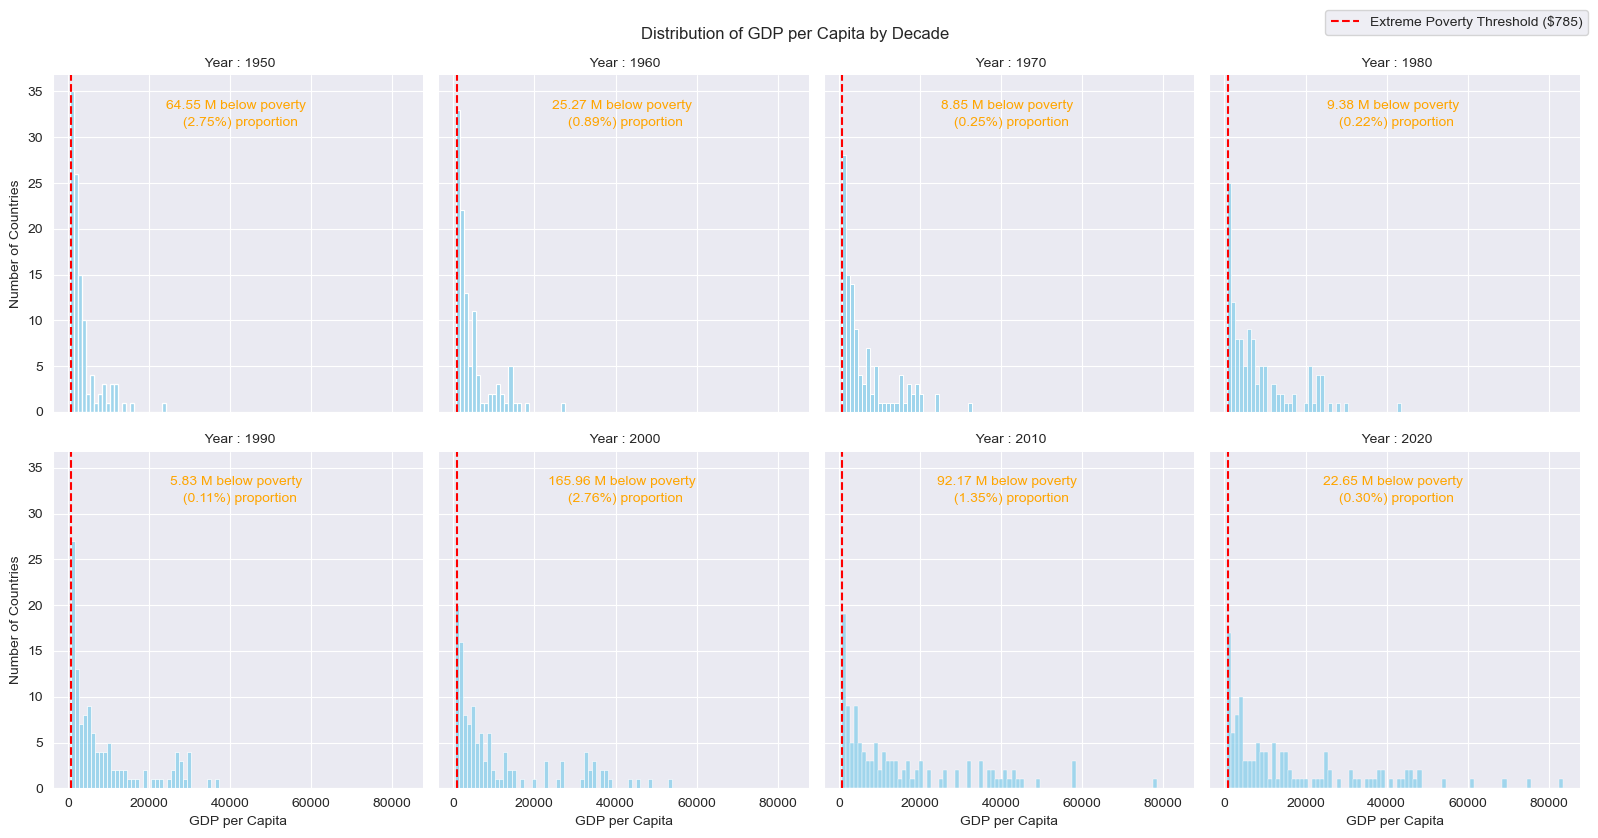

In [91]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.
#1.) Make a plot that shows the distribution of GDP per capita across countries at each decade from
#1950 to 2020 (i.e., at the years 1950, 1960, 1970, etc.). Only include countries with a population of at
#least 5 million in 2020
df_clean = df.dropna(subset=['gdp', 'population','iso_code'])
# 15211:  len(df_clean)

df_clean = df_clean[df_clean['population'] > 0].copy()
df_clean['gdp_per_capita'] = df_clean['gdp'] / df_clean['population']
country_5M = df_clean.loc[(df_clean['year'] == 2020) & (df_clean['population'] > 5000000)]
#print(country_5M)
# Filter only country with population > 5M in year 2020
df_clean_filter_population_year = df_clean.loc[(df_clean['year'].isin(range(1950,2021,10))) & df_clean['iso_code'].isin(country_5M['iso_code'])]
#print(df_clean_filter_population_year)

#The World Bank defines an income of less than $2.15 per day as extreme poverty, corresponding to
#an annual GDP per capita of $785. Mark this threshold on your plots.
#2.) For each year shown, calculate the number of people living in countries with a GDP per capita below this level and annotate this in your figure. 
# Comment on whether this population has grown or shrunk as a proportion of the world’s total population over time.

# Initialize FacetGrid with columns by decade, setting figure size and column wrap
g = sns.FacetGrid(df_clean_filter_population_year, col="year", col_wrap=4, height=4, sharey=True)
g.map(sns.histplot, "gdp_per_capita", binwidth=1000, kde=False, color='skyblue')

# Add the poverty threshold line to each histogram
poverty_threshold = 785
for ax in g.axes.flat:
    ax.axvline(x=poverty_threshold, color='red', linestyle='--')

# Add a single legend for the poverty line outside the grid
plt.figlegend(['Extreme Poverty Threshold ($785)'], loc='upper right', bbox_to_anchor=(1, 1.05))

g.set_axis_labels("GDP per Capita", "Number of Countries")
g.set_titles(" Year : {col_name}")
plt.suptitle("Distribution of GDP per Capita by Decade", y=1.02)

# Create a dictionary to map years to their subplot index in the FacetGrid
year_to_index = {year: i for i, year in enumerate(range(1950, 2021, 10))}
yearly_poverty_stats = {}

# Loop through each decade to calculate and annotate the population below the poverty line
for year in range(1950, 2021, 10): 

    # Filter year and countries with GDP below the threshold
    data_year = df_clean_filter_population_year[(df_clean_filter_population_year['year'] == year) & (df_clean_filter_population_year['gdp_per_capita'] < poverty_threshold)]
        
    # Total world population for the year in this scenario only 1950-2021 and >5M
    total_population_by_year = df_clean_filter_population_year.groupby('year')['population'].sum()  
    
    # Sum the population of these countries
    population_below_poverty = data_year['population'].sum()
    #print(population_below_poverty)
    
    # Total world population for the specific year
    total_world_population = total_population_by_year[year]
   
    # Calculate poverty proportion
    poverty_proportion = (population_below_poverty / total_world_population) * 100
    #print(poverty_proportion)
    
    yearly_poverty_stats[year] = {"population_below_poverty": population_below_poverty, "poverty_proportion": poverty_proportion}
    #print(f"Year: {year}, Data: {yearly_poverty_stats[year]}")
    
    # Add annotation to the corresponding axis in the FacetGrid
    ax = g.axes.flat[year_to_index[year]]
    ax.text(0.5, 0.9, f"{population_below_poverty / 1e6:.2f} M below poverty ",
            transform=ax.transAxes, ha='center', color='orange', fontsize=10)
    ax.text(0.5, 0.85, f" ({poverty_proportion:.2f}%) proportion",
            transform=ax.transAxes, ha='center', color='orange', fontsize=10)
plt.show()



# ADD YOUR ANSWER TO THE QUESTION HERE

In [92]:
#Comment on whether this population has grown or shrunk as a proportion of the world’s total population over time.

#[ANSWER]
#According to the graph, the population living in poverty has varied across decades. In 1950, approximately 64.5 million people, or 2.75% of the below poverty/total population. This figure shrank to about 25.27 million and proportion (0.89%) in 1960, and by 1970, it had further declined to 8.85 million (0.25%). However, in 1980, although the population below poverty increased slightly to 9.38 million, the proportion continued to decrease to 0.22%.
# In 1990, the poverty-stricken population continued to decline, reaching 5.83 million (0.11%). However, in 2000, there was a sharp increase to 165.96 million, with the proportion rising to 2.76%. This number decreased again in 2010, with 92.17 million people (1.35%) below the poverty line. Finally, in 2020, the population below the poverty threshold dropped to 22.65 million, representing just 0.30% of the total population.

## Before submitting

If you have used print statements for debugging purposes, please make sure that you remove them before submitting your notebook. When the submitted notebook runs it should only generate the plots and no additional output.

Double check that your notebook runs correctly when cells are run in order from the beginning. You can do this by selecting "Restart and run all" from the Kernel menu. 

Make sure that you save your notebook using the name `COM6018-assignment1-<your-student-username>.ipynb`. For example, if your username is 'ac1jpb' then your notebook should be named `COM6018-assignment1-ac1jpb.ipynb`. 

To submit, follow the instruction in the accompanying assignment instructions document. For late submission, unless there are extenuating circumstances, standard lateness penalties will be applied.